### Gradient Descent

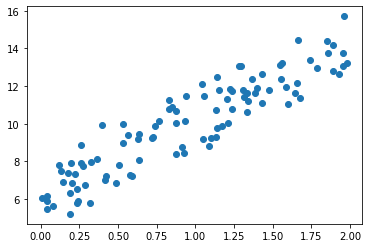

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time

np.random.seed(0)
# y = 4X + 6
X = 2 * np.random.rand(100, 1) # Array(100 x 1)
y = 4 * X + 6 + np.random.randn(100, 1) # add noise

plt.scatter(X, y)

In [2]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

In [3]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)
  # h(theta)
  y_pred = np.dot(X, w1.T) + w0
  diff = y-y_pred

  w0_factors = np.ones((N, 1))

  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update


In [16]:
def gradient_descent_steps(X, y, iters=10000):
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))

  for i in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 -= w1_update
    w0 -= w0_update
  return w1, w0

In [18]:
start_time = time.time()
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1: %.3f / w2: %.3f"%(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*X + w0
print("Gradient Descent Total Cost : %.4f"%(get_cost(y, y_pred)))
print("total time : %.4f"%(time.time() - start_time))

w1: 4.022 / w2: 6.162
Gradient Descent Total Cost : 0.9935
total time : 0.0202


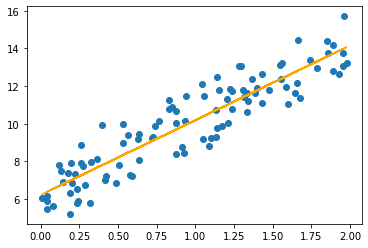

In [12]:
plt.scatter(X, y)
plt.plot(X, y_pred, c="orange")

### (Mini batch) Stochastic gradient descent

In [13]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000): # if batch_size == 1, then It is just Stochastic gradient descent
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))
  prev_cost = 100000
  
  for i in range(iters):
    np.random.seed(i)
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 -= w1_update
    w0 -= w0_update
  return w1, w0

In [19]:
start_time = time.time()
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1: %.3f / w2: %.3f"%(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*X + w0
print("Gradient Descent Total Cost : %.4f"%(get_cost(y, y_pred)))
print("total time : %.4f"%(time.time() - start_time))

w1: 4.028 / w2: 6.156
Gradient Descent Total Cost : 0.9937
total time : 0.0419
